In [1]:
import tensorflow as tf 
print(tf.__version__) 

2.14.0


In [2]:
import keras
keras.__version__

'2.14.0'

In [4]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
train=pd.read_table('train.txt', delimiter = ';', header=None, )
val=pd.read_table('val.txt', delimiter = ';', header=None, )
test=pd.read_table('test.txt', delimiter = ';', header=None, )

data = pd.concat([train ,  val , test])
data.columns = ["text", "label"]



In [4]:
data.shape

(20000, 2)

In [3]:
data.isna().any(axis=1).sum()

0

In [5]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR
    #trun list into sentences
    return " ".join(review)


In [5]:
import nltk.corpus 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bishal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
data['text']=data['text'].apply(lambda x: preprocess(x))


In [14]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['N_label'] = label_encoder.fit_transform(data['label'])


In [15]:
data['N_label']

0       4
1       4
2       0
3       3
4       0
       ..
1995    0
1996    0
1997    2
1998    2
1999    1
Name: N_label, Length: 20000, dtype: int32

In [16]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=10000,ngram_range=(1,3))

data_cv = cv.fit_transform(data['text']).toarray()




In [17]:
data_cv.shape

(20000, 10000)

In [10]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test=data_cv,test_cv,train['N_label'],test['N_label']
X_train, X_test, y_train, y_test =train_test_split(data_cv, data['N_label'], test_size=0.25, random_state=42)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

max_words = 10000
max_sequence_length = 10000

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from keras.callbacks import Callback
from math import sqrt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

In [239]:
#data.values.reshape(-1,1)

In [243]:
# load the dataset
# split into input (X) and output (y) variables
# define the keras model

#model = Sequential()
#model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(6, activation='softmax'))

#model = Sequential()
##keras.layers.Embedding(input_dim=(X_train.shape[1],), output_dim=128, input_length=max_sequence_length),
#model.add(LSTM(64,input_shape=(X_train.shape[1],), return_sequences=True, activation= 'relu')),
#model.add(LSTM(64,return_sequences=False, activation= 'relu')),
#model.add(Dense(6, activation='sigmoid'))

from keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_words))
model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
#model.add(LSTM(16, return_sequences=True, activation='relu'))
#model.add(Conv1D(64, 5, activation='relu'))
#model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))


model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_59 (Embedding)    (None, 10000, 32)         320000    
                                                                 
 conv1d_38 (Conv1D)          (None, 9996, 64)          10304     
                                                                 
 max_pooling1d_27 (MaxPooli  (None, 2499, 64)          0         
 ng1D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 159936)            0         
                                                                 
 dense_212 (Dense)           (None, 32)                5117984   
                                                                 
 dropout_46 (Dropout)        (None, 32)                0         
                                                     

In [244]:
cp1 = ModelCheckpoint('sentiment_model_v4_10000_features/', save_best_only=True)

In [245]:


# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[cp1], batch_size=64)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
235/235 [==============================] - ETA: 0s - loss: 1.5401 - accuracy: 0.3423INFO:tensorflow:Assets written to: sentiment_model_v4_10000_features\assets


INFO:tensorflow:Assets written to: sentiment_model_v4_10000_features\assets


235/235 [==============================] - 261s 1s/step - loss: 1.5401 - accuracy: 0.3423 - val_loss: 1.1840 - val_accuracy: 0.5542
Epoch 2/10
235/235 [==============================] - ETA: 0s - loss: 0.8988 - accuracy: 0.6735INFO:tensorflow:Assets written to: sentiment_model_v4_10000_features\assets


INFO:tensorflow:Assets written to: sentiment_model_v4_10000_features\assets


235/235 [==============================] - 245s 1s/step - loss: 0.8988 - accuracy: 0.6735 - val_loss: 0.7251 - val_accuracy: 0.7508
Epoch 3/10
235/235 [==============================] - ETA: 0s - loss: 0.5494 - accuracy: 0.8016INFO:tensorflow:Assets written to: sentiment_model_v4_10000_features\assets


INFO:tensorflow:Assets written to: sentiment_model_v4_10000_features\assets


235/235 [==============================] - 237s 1s/step - loss: 0.5494 - accuracy: 0.8016 - val_loss: 0.6394 - val_accuracy: 0.7884
Epoch 4/10
235/235 [==============================] - ETA: 0s - loss: 0.3892 - accuracy: 0.8671INFO:tensorflow:Assets written to: sentiment_model_v4_10000_features\assets


INFO:tensorflow:Assets written to: sentiment_model_v4_10000_features\assets


235/235 [==============================] - 231s 985ms/step - loss: 0.3892 - accuracy: 0.8671 - val_loss: 0.6118 - val_accuracy: 0.8166
Epoch 5/10
235/235 [==============================] - 226s 960ms/step - loss: 0.2747 - accuracy: 0.9069 - val_loss: 0.6375 - val_accuracy: 0.8220
Epoch 6/10
235/235 [==============================] - 226s 963ms/step - loss: 0.2266 - accuracy: 0.9234 - val_loss: 0.7260 - val_accuracy: 0.8172
Epoch 7/10
235/235 [==============================] - 226s 964ms/step - loss: 0.1860 - accuracy: 0.9375 - val_loss: 0.7599 - val_accuracy: 0.8216
Epoch 8/10
235/235 [==============================] - 225s 957ms/step - loss: 0.1660 - accuracy: 0.9456 - val_loss: 0.7613 - val_accuracy: 0.8174
Epoch 9/10
235/235 [==============================] - 226s 964ms/step - loss: 0.1549 - accuracy: 0.9495 - val_loss: 0.7730 - val_accuracy: 0.8210
Epoch 10/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0580 - accuracy: 0.9848
Accuracy: 98.48


In [ ]:
# Save the model
model.save("mental_health_classification_model_v4_10000_feature.keras")

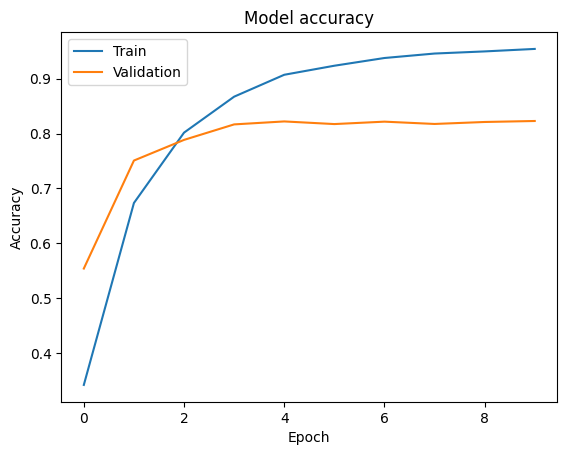

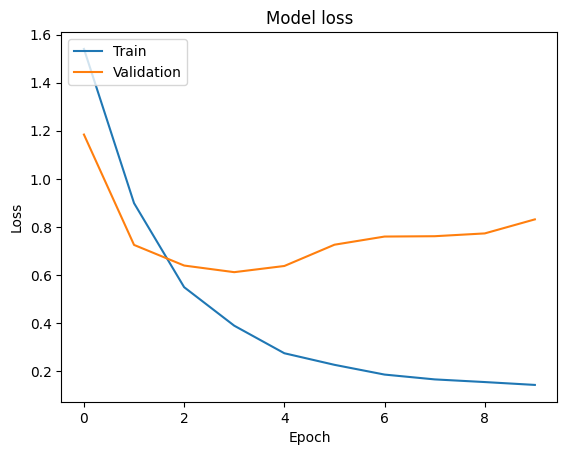

In [247]:
import matplotlib.pyplot as plt
# Plot the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [248]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

157/157 [==============================] - 18s 111ms/step - loss: 0.8314 - accuracy: 0.8228
Accuracy: 82.28


In [1]:
from tensorflow.keras.models import load_model

model=load_model("mental_health_classification_model_v4_10000_feature.keras")

In [4]:
import pickle
# Load the tokenizer for text preprocessing
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Load the vectorizers for text preprocessing
with open('vectorizer_bow.pkl', 'rb') as f:
    vectorizer_bow = pickle.load(f)
with open('vectorizer_tfidf.pkl', 'rb') as f:
    vectorizer_tfidf = pickle.load(f)

In [13]:
from keras.preprocessing.sequence import pad_sequences
def chatbot_response(user_input):
    # Tokenize user input
    user_input_sequence = tokenizer.texts_to_sequences([user_input])

    # Transform user input into BoW and TF-IDF features
    user_input_bow = vectorizer_bow.transform([user_input])
    user_input_tfidf = vectorizer_tfidf.transform([user_input])

    # Concatenate BoW and TF-IDF features
    user_input_combined = np.concatenate((user_input_bow.toarray(), user_input_tfidf.toarray()), axis=1)

    # Pad the user input to have the same length as the training data
    max_sequence_length = 5000  
    user_input_padded = pad_sequences(user_input_combined, maxlen=max_sequence_length)

    # Make predictions
    prediction = model.predict(user_input_padded)

    # Interpret predictions
    predicted_class = np.argmax(prediction)
    class_names = ["sadness", "anger", "love", "surprise", "joy", "fear"] 
    response = class_names[predicted_class]

    return response

In [ ]:
# Main chat loop
print("Chatbot: Hi! How can I assist you today? Type 'exit' to end the conversation.")
while True:
    user_input = input("You: ")
    if user_input.lower() == 'exit':
        print("Chatbot: Goodbye!")
        break
    response = chatbot_response(user_input)
    print("Chatbot:", response)

In [2]:
import pickle
import numpy as np
with open('CountVectorizer_v4.pkl', 'rb') as file:
    content = file.read()
    cv2= pickle.loads(content)
with open('encoder_v4.pkl', 'rb') as file:
    content = file.read()
    label_encoder2 = pickle.loads(content)




In [19]:
#---Pranoy71---#
text ="His eyes narrowed, a storm brewing within as he surveyed the shattered pieces before him, his voice cold and steady, “Someone will answer for this chaos. "
text=preprocess(text)
array = cv2.transform([text]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)
senti=label_encoder2.inverse_transform(a)[0]
print(senti)

1/1 [==============================] - 0s 24ms/step
fear


In [371]:
tf.keras.models.save_model(model,'my_model.h5')
Did you know that when you visit Cellular Jail. The walls of the mansion seem to whisper secrets of its dirty past.

In [19]:
import pickle
pickle.dump(label_encoder, open('encoder_v4.pkl', 'wb'))
pickle.dump(cv, open('CountVectorizer_v4.pkl', 'wb'))
